## Fase 2: Transformación de los datos.

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Libreria Regex para buscar patrones
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
#apertura del archivo
df_info= pd.read_csv("hr_raw_data.csv", index_col = 0)

pd.set_option('display.max_columns', None)

# 5 primeras filas del data frame

df_info.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


### **A. MODIFICACIÓN DE COLUMNAS**

**1. nombre columnas en minusculas:**
- "employeecount"
- "employeenumber"

**2. nombre columnas de una sola palabra capitalizada que hay que pasar a minúsculas**
- 'Age'
- 'Attrition'
- 'Department'
- 'Education'
- 'Gender'
- 'Salary'
- 'RemoteWork'

**3. nombre de columnas en mayusculas que hay que pasar a minusculas  despues separar las palabras con un guion bajo**
- NUMCOMPANIESWORKED
- WORKLIFEBALANCE
- TOTALWORKINGYEARS
- WORKLIFEBALANCE
- YEARSWITHCURRMANAGER
- 'NUMBERCHILDREN'


**4. nombre de columnas con alguna mayuscula para pasar a minusculas despues separar las palabras**
- 'BusinessTravel':
- 'DailyRate':
- 'DistanceFromHome':
- 'EducationField':
- 'EnvironmentSatisfaction':
- 'HourlyRate':
- 'JobInvolvement':
- 'JobLevel':
- 'JobRole':'
- JobSatisfaction':
- 'MaritalStatus':'MonthlyIncome','MonthlyRate',
- 'Over18','OverTime', 'PercentSalaryHike','PerformanceRating',
- 'RelationshipSatisfaction','StandardHours','StockOptionLevel',
- 'TrainingTimesLastYear',
- 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
- 'SameAsMonthlyIncome','DateBirth',
- 'RoleDepartament'

Podemos ver que hay variedad de formatos en la sintaxis de los nombres de las columnas lo mas operativo es unificarlos todos con el mismo formato que el grupo 4 y despues en una unica funcion transformamos todos a la vez, asi no hay que ir de uno en uno.

Vemos un patron comun y es que en el grupo 2 y 4 hay nombres capitalizados 
el grupo  1 y 3 no comparten nada por lo tanto vamos a cambiar manualmente estos 2 grupos para igualarlos en el formato al 4 


In [3]:
# Esta función utiliza el método rename() de Pandas para renombrar columnas específicas de un DataFrame. 
# Creamos un diccionario (renombrar_columnas) que indica los nombres actuales de las columnas como claves y los nuevos nombres como valores.
renombrar_columnas = {
        'TOTALWORKINGYEARS': 'TotalWorkingYears',
        'employeenumber': 'EmployeeNumber',
        'NUMCOMPANIESWORKED': 'NumCompaniesWorked',
        'WORKLIFEBALANCE': 'WorkLifeBalance',
        'YEARSWITHCURRMANAGER': 'YearsWithCurrManager',
        'NUMBERCHILDREN': 'NumberChildren',
        'employeecount': 'EmployeeCount'
    }
df_info.rename(columns=renombrar_columnas, inplace=True)

In [4]:
df_info.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'SameAsMonthlyIncome', 'DateBirth', 'Salary',
       'RoleDepartament', 'NumberChildren', 'RemoteWork'],
      dtype='object')

In [5]:
# Esta función Convierte un string en formato CamelCase (donde las palabras están pegadas y la primera letra de cada palabra está en mayúscula, excepto la primera palabra) 
# en snake_case (donde las palabras están separadas por guiones bajos y todas las letras están en minúsculas).

#Función camel_to_snake(name):

def camel_to_snake(name):
    # Insert underscore between lowercase and uppercase characters and convert to lowercase
    return re.sub('([a-z])([A-Z])', r'\1_\2', name).lower()

df_info.columns = [camel_to_snake(col) for col in df_info.columns]

df_info.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_count',
       'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over18', 'over_time', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager',
       'same_as_monthly_income', 'date_birth', 'salary', 'role_departament',
       'number_children', 'remote_work'],
      dtype='object')

In [6]:
df_info.head(2)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_departament,number_children,remote_work
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1


In [7]:
df_info.to_csv('HR_01.csv', index= False)

In [8]:
df_info.head(2)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_departament,number_children,remote_work
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1


In [9]:
df_transformacion= pd.read_csv("HR_01.csv", index_col = None)
df_transformacion_copy = df_transformacion.copy()

In [10]:
df_transformacion_copy.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_departament,number_children,remote_work
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


### **B. MODIFICACIÓN DE TIPO DE DATO**

**B.1.**

In [11]:
df_transformacion_copy.dtypes

age                            object
attrition                      object
business_travel                object
daily_rate                     object
department                     object
distance_from_home              int64
education                       int64
education_field                object
employee_count                  int64
employee_number                object
environment_satisfaction        int64
gender                          int64
hourly_rate                    object
job_involvement                 int64
job_level                       int64
job_role                       object
job_satisfaction                int64
marital_status                 object
monthly_income                 object
monthly_rate                    int64
num_companies_worked            int64
over18                         object
over_time                      object
percent_salary_hike             int64
performance_rating             object
relationship_satisfaction       int64
standard_hou

In [12]:
# Entero a float : monthly_rate

df_transformacion_copy["monthly_rate"]=df_transformacion_copy["monthly_rate"].astype(float)
df_transformacion_copy["monthly_rate"].dtypes

dtype('float64')

In [13]:
# Entero a object : gender
df_transformacion_copy["gender"]=df_transformacion_copy["gender"].astype(object)
df_transformacion_copy["gender"].dtypes


dtype('O')

In [14]:
# Object quitar caracter especial "$": "daily_rate" "salary"

columnas1 = ["daily_rate","salary"]

def cambiar_simbolo(columnas): 
    try:
        return columnas.str.replace("$","")
    except:
        return np.nan

for columna in columnas1:
    df_transformacion_copy[columna] = cambiar_simbolo(df_transformacion_copy[columna])

df_transformacion_copy.head()




/tmp/ipykernel_5406/2198465015.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  return columnas.str.replace("$","")


,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_departament,number_children,remote_work
0,51,No,NaN,"684,0",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462.0,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000,NaN,NaN,Yes
1,52,No,NaN,"699,0",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678.0,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000,NaN,NaN,1
2,42,No,travel_rarely,"532,0",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933.0,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,"359,0",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703.0,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000,NaN,NaN,False
4,46,No,NaN,"1319,0",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739.0,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000,NaN,NaN,0


In [15]:
# Object a float :"hourly_rate","monthly_income","standard_hours"

columnas_a_float = ["daily_rate","hourly_rate","monthly_income","standard_hours","salary"]

def cambiar_object_float(columnas):
    try:
        return columnas.str.replace(',', '.').astype(float)
    except:
        return np.nan

for columna in columnas_a_float:
    df_transformacion_copy[columna] = cambiar_object_float(df_transformacion_copy[columna])


df_transformacion_copy[columnas_a_float].dtypes



daily_rate        float64
hourly_rate       float64
monthly_income    float64
standard_hours    float64
salary            float64
dtype: object

In [16]:
df_transformacion_copy.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_departament,number_children,remote_work
0,51,No,NaN,684.0,NaN,6,3,NaN,1,"162,0",1,0,NaN,3,5,resEArch DIREcToR,3,NaN,19537.0,6462.0,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1.000000e+09,NaN,NaN,Yes
1,52,No,NaN,699.0,NaN,1,4,Life Sciences,1,"259,0",3,0,NaN,2,5,ManAGeR,3,NaN,19999.0,5678.0,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1.000000e+09,NaN,NaN,1
2,42,No,travel_rarely,532.0,Research & Development,4,2,Technical Degree,1,"319,0",3,0,NaN,3,5,ManaGER,4,Married,19232.0,4933.0,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1.000000e+09,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,359.0,NaN,2,4,Medical,1,NaN,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,17169.0,26703.0,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1.000000e+09,NaN,NaN,False
4,46,No,NaN,1319.0,NaN,3,3,Technical Degree,1,NaN,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739.0,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1.000000e+09,NaN,NaN,0


**B.2. HOMOGENEIZACIÓN TIPO DATO**

In [17]:
# Comprobar los valores únicos de las variables "age", "remote_work", "over18"

print(f'Analizar los valores únicos de las variables:\n-Variable "age":\n{df_transformacion_copy["age"].unique()}\n-Variable "remote_work":\n{df_transformacion_copy["remote_work"].unique()}\n-Variable "over18":\n{df_transformacion_copy["over18"].unique()}')

Analizar los valores únicos de las variables:
-Variable "age":
['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' 'forty-seven' '53' '43' '60' '32' '37' '49' '39' '50'
 '44' '30' 'fifty-eight' '29' '31' '54' '57' '27' 'thirty-six' '28' '26'
 'fifty-five' '25' 'fifty-two' 'thirty-one' '24' 'thirty' '23' '22' '21'
 '20' 'twenty-six' '19' 'thirty-seven' '18' 'thirty-two' 'twenty-four']
-Variable "remote_work":
['Yes' '1' 'False' '0' 'True']
-Variable "over18":
['Y' nan]


In [18]:
# Reemplazar los valores para su homogeneización:

dicc_age = {"forty-seven": "47", "fifty-eight": "58", "thirty-six": "36", "fifty-five": "55", "fifty-two": "52", "thirty-one": "31", "thirty": "30", "twenty-six": "26", "thirty-seven": "37", "thirty-two": "32", "twenty-four": "24"}

dicc_remote = {"0": "No", "1": "Yes", "True":"Yes", "False": "No"}

dicc_over18 = {"Y": "Yes"}

def reemplazar_datos(df_transformacion_copy):
    
    df_transformacion_copy["age"] = df_transformacion_copy["age"].replace(dicc_age)

 
    df_transformacion_copy["remote_work"] = df_transformacion_copy["remote_work"].replace(dicc_remote)

 
    df_transformacion_copy["over18"] = df_transformacion_copy["over18"].replace(dicc_over18)

    return df_transformacion_copy

df_transformacion_copy = reemplazar_datos(df_transformacion_copy)

In [19]:
# Comprobar los valores únicos de las variables "age", "remote_work", "over18" después del reemplazo

print(f'Comprobación de la homogeneización de los valores depués del reemplazo:\n-Variable "age":\n{df_transformacion_copy["age"].unique()}\n-Variable "remote_work":\n{df_transformacion_copy["remote_work"].unique()}\n-Variable "over18":\n{df_transformacion_copy["over18"].unique()}')

Comprobación de la homogeneización de los valores depués del reemplazo:
-Variable "age":
['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' '53' '43' '60' '32' '37' '49' '39' '50' '44' '30'
 '29' '31' '54' '57' '27' '28' '26' '25' '24' '23' '22' '21' '20' '19'
 '18']
-Variable "remote_work":
['Yes' 'No']
-Variable "over18":
['Yes' nan]


In [20]:
df_transformacion_copy.head(40)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_departament,number_children,remote_work
0,51,No,NaN,684.0,NaN,6,3,NaN,1,"162,0",1,0,NaN,3,5,resEArch DIREcToR,3,NaN,19537.0,6462.0,7,Yes,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1.000000e+09,NaN,NaN,Yes
1,52,No,NaN,699.0,NaN,1,4,Life Sciences,1,"259,0",3,0,NaN,2,5,ManAGeR,3,NaN,19999.0,5678.0,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1.000000e+09,NaN,NaN,Yes
2,42,No,travel_rarely,532.0,Research & Development,4,2,Technical Degree,1,"319,0",3,0,NaN,3,5,ManaGER,4,Married,19232.0,4933.0,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1.000000e+09,ManaGER - Research & Development,NaN,Yes
3,47,No,travel_rarely,359.0,NaN,2,4,Medical,1,NaN,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,17169.0,26703.0,3,Yes,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1.000000e+09,NaN,NaN,No
4,46,No,NaN,1319.0,NaN,3,3,Technical Degree,1,NaN,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739.0,2,Yes,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1.000000e+09,NaN,NaN,No
5,48,No,NaN,117.0,Research & Development,22,3,Medical,1,"1900,0",4,1,NaN,3,4,MANAger,4,NaN,17174.0,2437.0,3,NaN,No,11,"3,0",2,NaN,1,NaN,3,"3,0",22,NaN,4,7,"17174,0",1975,1.000000e+09,MANAger - Research & Development,NaN,Yes
6,59,No,NaN,1435.0,NaN,25,3,Life Sciences,1,"81,0",1,1,NaN,3,3,Sales ExeCutIVe,1,NaN,NaN,2354.0,7,Yes,NaN,11,"3,0",4,NaN,0,"28,0",3,"2,0",21,NaN,7,9,NaN,1964,1.000000e+09,NaN,NaN,Yes
7,42,No,travel_rarely,635.0,NaN,1,1,NaN,1,"387,0",2,0,NaN,3,2,Sales eXEcUTiVe,3,Married,NaN,24532.0,1,NaN,No,25,"4,0",3,NaN,0,"20,0",3,"3,0",20,NaN,11,6,NaN,1981,1.000000e+09,NaN,NaN,No
8,41,No,NaN,1276.0,NaN,2,5,NaN,1,NaN,2,1,NaN,3,4,mANAGEr,1,Married,16595.0,5626.0,7,NaN,No,16,"3,0",2,NaN,1,"22,0",2,"3,0",18,NaN,11,8,"16595,0",1982,1.000000e+09,NaN,NaN,Yes
9,41,No,travel_frequently,840.0,NaN,9,3,NaN,1,"999,0",1,0,NaN,3,5,reSEaRCH DIrectoR,3,NaN,NaN,3735.0,2,NaN,No,17,"3,0",2,NaN,1,"21,0",2,"4,0",18,NaN,0,11,NaN,1982,1.000000e+09,NaN,NaN,No


**B.3. VARIABLES CON VALORES NULOS**

**1. Columnas categóricas con nulos**

In [21]:
# Lista de las columnas categóricas con nulos:

categoricas = ["over18", "education_field", "over_time"]

1.1. Distribución de las categorías por cada columna

In [22]:
for columna in categoricas:
    print(f"La distribución de las categorías para la columna: {columna}")
    display(df_transformacion_copy[columna].value_counts() / df_transformacion_copy.shape[0]) 
    print("______________________")

La distribución de las categorías para la columna: over18


Yes    0.44176
Name: over18, dtype: float64

______________________
La distribución de las categorías para la columna: education_field


Life Sciences       0.216233
Medical             0.171004
Marketing           0.064436
Technical Degree    0.042751
Other               0.036555
Human Resources     0.007435
Name: education_field, dtype: float64

______________________
La distribución de las categorías para la columna: over_time


No     0.422553
Yes    0.158612
Name: over_time, dtype: float64

______________________


1.2. Divisón de las columnas en dos grupos / tipos:

- Columnas a reemplazar por la moda:

    - OVER18 -->  44%
    - OVER_TIME --> 42%

- Columnas a reemplazar por una categoría / etiqueta nueva:

    - EDUCATION_FIELD --> etiqueta "Other"
    - 
    - 

- **Columnas categóricas a reemplazar por la moda:**

In [23]:
# Columnas categóricas con valores nulos: Cambiar de object a entero

columna18_moda = ["over18", "over_time"]

def reemplazar_moda (df_transformacion_copy, columnas_moda):
    
    for columna in columnas_moda:
        
        moda = df_transformacion_copy[columna].mode()[0]    
        
        df_transformacion_copy[columna] = df_transformacion_copy[columna].fillna(moda)

    return df_transformacion_copy

df_transformacion_copy = reemplazar_moda(df_transformacion_copy, columna18_moda)

df_transformacion_copy[columna18_moda].isnull().sum()

over18    0
dtype: int64

In [24]:
df_transformacion_copy["over18"].unique()

array(['Yes'], dtype=object)

- **Columnas categóricas a reemplazar por una categoría / etiqueta nueva:**

In [25]:
columnas_etiqueta = ["education_field"]

def reemplazar_etiqueta(df_transformacion_copy, columnas):
    
    for columna in columnas:
        
        df_transformacion_copy[columna] = df_transformacion_copy[columna].fillna("Other")
    
    return df_transformacion_copy

df_transformacion_copy = reemplazar_etiqueta(df_transformacion_copy, columnas_etiqueta)

df_transformacion_copy[columnas_etiqueta].isnull().sum()



education_field    0
dtype: int64

In [26]:
df_transformacion_copy["education_field"].unique()

array(['Other', 'Life Sciences', 'Technical Degree', 'Medical',
       'Marketing', 'Human Resources'], dtype=object)

## **CONTINUACIÓN**

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Libreria Regex para buscar patrones
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [66]:
df_transformacion = pd.read_csv("HR_02.csv", index_col = None)
df_prueba = df_transformacion.copy()

In [67]:
df_prueba.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work
0,51,No,Unknown,684.0,Research & Development,6,3,Other,1,162.0,1,0,51,3,5,Research Director,3,Unknown,19537.0,6462.0,7,Yes,No,13,3.0,3,NaN,0,NaN,5,3.0,20,15,15,1972,1.000000e+09,Yes
1,52,No,Unknown,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,0,65,2,5,Manager,3,Unknown,19999.0,5678.0,0,Yes,No,14,3.0,1,NaN,1,34.0,5,3.0,33,11,9,1971,1.000000e+09,Yes
2,42,No,travel rarely,532.0,Research & Development,4,2,Technical Degree,1,319.0,3,0,58,3,5,Manager,4,Married,19232.0,4933.0,1,Yes,No,11,3.0,4,NaN,0,22.0,3,NaN,22,11,15,1981,1.000000e+09,Yes
3,47,No,travel rarely,359.0,Research & Development,2,4,Medical,1,NaN,1,1,82,3,4,Research Director,3,Married,17169.0,26703.0,3,Yes,No,19,3.0,2,NaN,2,NaN,2,NaN,20,5,6,1976,1.000000e+09,No
4,48,No,Unknown,117.0,Research & Development,22,3,Medical,1,1900.0,4,1,58,3,4,Manager,4,Unknown,17174.0,2437.0,3,Yes,No,11,3.0,2,NaN,1,NaN,3,3.0,22,4,7,1975,1.000000e+09,Yes


### **VARIABLES NUMÉRICAS: monthly_income Y performance_rating**

**1. Porcentaje de NULOS**

In [11]:
numericas = ["monthly_income", "performance_rating"]

In [68]:
df_prueba[numericas].isnull().sum() / df_prueba.shape[0]

monthly_income        0.518519
performance_rating    0.126852
dtype: float64

- monthly_income --> 51 % valores nulos

- performance_rating --> 12 % valores nulos

**2. Presencia de OUTLIERS**

(2.8, 4.2)

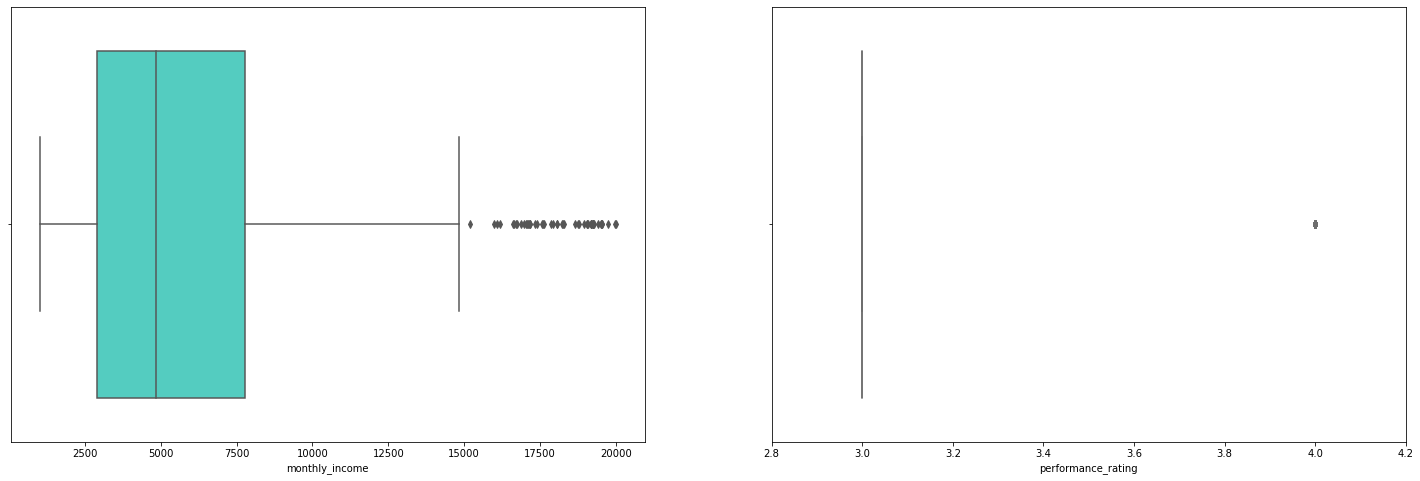

In [61]:
# Crear el subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 8))  # Aumenta el tamaño de la figura

# Primer boxplot
sns.boxplot(x="monthly_income",
            data=df_prueba,
            width=0.8,
            color="turquoise",
            ax=axes[0])

# Segundo boxplot
sns.boxplot(x="performance_rating",
            data=df_prueba,
            width=0.8,
            color="violet",
            ax=axes[1])

# Ajustar límites de los ejes para ver los cuartiles mejor
axes[1].set_xlim(2.8, 4.2)

- monthly_income --> 51 % valores nulos y muchos outliers --> IterativeImputer = porcentaje alto de valores nulos y muchos outliers.

- performance_rating --> 12 % valores nulos y pocos otliers --> SimpleImputer (Mediana) = porcentaje bajo de valores nulos y pocos outliers.

- **monthly_income**

In [71]:
# Instanciar la clase de InterativeImputer
imputar_monthly_income = IterativeImputer(max_iter = 20, random_state = 42)

# Ajustar y tranformar los datos
monthly_income_limpio = imputar_monthly_income.fit_transform(df_prueba[["monthly_income"]])

df_prueba["monthly_income"] = monthly_income_limpio

In [72]:
# Comprobar los nulos
print(f"Después del 'IterativeImputer' tenemos: \n{df_prueba[['monthly_income']].isnull().sum()} nulos")

Después del 'IterativeImputer' tenemos: 
monthly_income    0
dtype: int64 nulos


- **performance_rating**

In [73]:
# Instanciar la clase de SimpleImputer
imputar_performance_rating = SimpleImputer(strategy = "median")

# Ajustar y transformamos los datos.
performance_rating_limpio = imputar_performance_rating.fit_transform(df_prueba[["performance_rating"]])
 
performance_rating_limpio

array([[3.],
       [3.],
       [3.],
       ...,
       [3.],
       [3.],
       [3.]])

In [74]:
# Introducir el array en el DataFrame
df_prueba["performance_rating"] = performance_rating_limpio

# Comprobar los nulos. 
print(f"Después del 'SimpleImputer' tenemos {df_prueba['performance_rating'].isnull().sum()} nulos")

Después del 'SimpleImputer' tenemos 0 nulos


**3. Cambio de TIPO DE DATO** (de float a int). 

In [78]:
df_prueba["monthly_income"].dtypes

dtype('float64')

In [79]:
df_prueba["performance_rating"].dtypes

dtype('float64')

In [81]:
df_prueba["monthly_rate"] = df_prueba["monthly_rate"].astype(int)
df_prueba["monthly_rate"].dtypes

dtype('int64')

In [82]:
df_prueba["performance_rating"] = df_prueba["performance_rating"].astype(int)
df_prueba["performance_rating"].dtypes

dtype('int64')